In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [69]:
# reading csv file as well as viewing the entire data for a proper understanding of the data set
pd.set_option("display.max_rows", 303)
heart_df = pd.read_csv("heart.csv") 
#viewing just the first 20 rows
heart_df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


A description of the entire columns in the data set.

In [98]:
#About this dataset

#Age : Age of the patient
#Sex : Sex of the patient
#exng: exercise induced angina (1 = yes; 0 = no)
#ca: number of major vessels (0-3)

#cp : Chest Pain type chest pain type

#Value 0: asymptomatic
#Value 1: atypical angina
#Value 2: non-anginal pain
#Value 3: typical angina

#The column thall represent data for a blood disorder called thalassemia with 

#Value 0 as NULl and was dropped from the dataset previously. 
#The Value 1 been a fixed defect (no blood flow in some part of the heart) and
#Value 2 as having a normal blood flow, 
#Value 3 has a reversible defect (a blood flow is observed but it is not normal). 

#trtbps : resting blood pressure (in mm Hg)
#chol : cholestoral in mg/dl fetched via BMI sensor
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#rest_ecg : resting electrocardiographic results

#Value 0: normal
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#thalach : maximum heart rate achieved
#output-target : 0= less chance of heart attack 1= more chance of heart attack

The values in certain columns in the data sets will be change for easy comprehension. The sex, cp, fbs, exng, slp, and output columns values will be altered to ensure a more elaborate understanding of the data set. Also! names of some columns will be change as well.

In [70]:
heart_df.loc[heart_df['sex']==1,'sex',]='male'
heart_df.loc[heart_df['sex']==0,'sex']='female'
heart_df.loc[heart_df['cp']==0, 'cp']='asymptomatic' 
heart_df.loc[heart_df['cp']==1, 'cp']= 'atypical_angina'
heart_df.loc[heart_df['cp']==2, 'cp']= 'non_anginal_pain'
heart_df.loc[heart_df['cp']==3, 'cp']= 'typical_angina'
heart_df.loc[heart_df['fbs']==1, 'fbs']='true'
heart_df.loc[heart_df['fbs']==0, 'fbs']='false'
heart_df.loc[heart_df['exng']==1, 'exng']='yes'
heart_df.loc[heart_df['exng']==0, 'exng']='no'
heart_df.loc[heart_df['slp']==0, 'slp']='downsloping'
heart_df.loc[heart_df['slp']==1, 'slp']='flat'
heart_df.loc[heart_df['slp']==2, 'slp']='upsloping'
heart_df.loc[heart_df['output']==1, 'output']='no'
heart_df.loc[heart_df['output']==0, 'output']='yes'

#changing columns names of cp to chest_pain_type, chol to cholesterol,thalachh to max_heartrate,
#exng to exercise_induced_angina, slp to slope, thall to thalassemia, output to  Heart_disease,

heart_df.rename(columns={'cp':'chest_pain_type', 'chol':'cholesterol', 
                          'thalachh':'max_heartrate','exng':'exercise_induced_angina','slp':'slope'}, inplace='true')

heart_df.rename(columns={'thall':'thalassemia','output':'heart_attack'}, inplace='true')

Checking the updated data frame.

In [71]:
heart_df.head(20)

,age,sex,chest_pain_type,trtbps,cholesterol,fbs,restecg,max_heartrate,exercise_induced_angina,oldpeak,slope,caa,thalassemia,heart_attack
0,63,male,typical_angina,145,233,true,0,150,no,2.3,downsloping,0,1,no
1,37,male,non_anginal_pain,130,250,false,1,187,no,3.5,downsloping,0,2,no
2,41,female,atypical_angina,130,204,false,0,172,no,1.4,upsloping,0,2,no
3,56,male,atypical_angina,120,236,false,1,178,no,0.8,upsloping,0,2,no
4,57,female,asymptomatic,120,354,false,1,163,yes,0.6,upsloping,0,2,no
5,57,male,asymptomatic,140,192,false,1,148,no,0.4,flat,0,1,no
6,56,female,atypical_angina,140,294,false,0,153,no,1.3,flat,0,2,no
7,44,male,atypical_angina,120,263,false,1,173,no,0.0,upsloping,0,3,no
8,52,male,non_anginal_pain,172,199,true,1,162,no,0.5,upsloping,0,3,no
9,57,male,non_anginal_pain,150,168,false,1,174,no,1.6,upsloping,0,2,no


Checking for any null values that might be present in the data frame.

In [72]:
#checking for null values
heart_df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
trtbps                     0
cholesterol                0
fbs                        0
restecg                    0
max_heartrate              0
exercise_induced_angina    0
oldpeak                    0
slope                      0
caa                        0
thalassemia                0
heart_attack               0
dtype: int64

In [73]:
#checking of possible relationships in our data frame
heart_df.corr()

,age,trtbps,cholesterol,restecg,max_heartrate,oldpeak,caa,thalassemia
age,1.000000,0.279351,0.213678,-0.116211,-0.398522,0.210013,0.276326,0.068001
trtbps,0.279351,1.000000,0.123174,-0.114103,-0.046698,0.193216,0.101389,0.062210
cholesterol,0.213678,0.123174,1.000000,-0.151040,-0.009940,0.053952,0.070511,0.098803
restecg,-0.116211,-0.114103,-0.151040,1.000000,0.044123,-0.058770,-0.072042,-0.011981
max_heartrate,-0.398522,-0.046698,-0.009940,0.044123,1.000000,-0.344187,-0.213177,-0.096439
oldpeak,0.210013,0.193216,0.053952,-0.058770,-0.344187,1.000000,0.222682,0.210244
caa,0.276326,0.101389,0.070511,-0.072042,-0.213177,0.222682,1.000000,0.151832
thalassemia,0.068001,0.062210,0.098803,-0.011981,-0.096439,0.210244,0.151832,1.000000


Max-heartrate and age has weak negative correlation, age and cholestrol shows weak positive correlation, old peak and max-heartrate has weak negative correlation, also oldpeak and thalassemia shows weak positive correlation as well. This gives us more insights into the data for better visualization and interpretation later on.

Let us be sure of the general population of male to female

In [74]:
#filtering out the male population from the female population
filtmen=heart_df['sex']=='male'
filtwomen=heart_df['sex']=='female'
#checking total number of men and women contained in the data
menNumber = heart_df.loc[filtmen, 'sex'].count()
womenNumber = heart_df.loc[filtwomen, 'sex'].count()
print(' Let it be knowned that the number of men is {} and the number of women is {}'.format(menNumber, womenNumber))

 Let it be knowned that the number of men is 207 and the number of women is 96


The population of men in this dataset is more than the population of women.

Now! lets take a look at chest pain type. As a discomfort, chest pain is associated with the lack of oxygen-rich blood flow to the heart. it is crucial to check the overall data of different combine cases of chest pain across different age and gender.

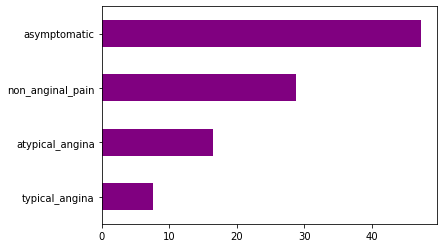

In [75]:
chest_pain=(heart_df['chest_pain_type'].value_counts(normalize=True)*100).sort_values().plot(kind='barh', color='purple')
chest_pain;

From the chart you can tell the a larger demographic shows no sign of chest pain initially and possibly will show later on after diagnostics. Non anginal patients were more than patients that showed signs of chest pain that could not be classified as angina. The general numbers of patient with actual angina ( heart pain ) were less.

So! lets create more insights on the various chest pain type. We will visually analyze the average and variance across different age and view both male and female across different age as well.

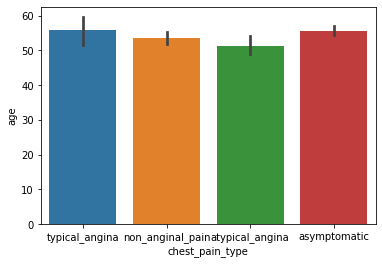

In [76]:
sns.barplot(x='chest_pain_type', 
            y='age', 
            data=heart_df);

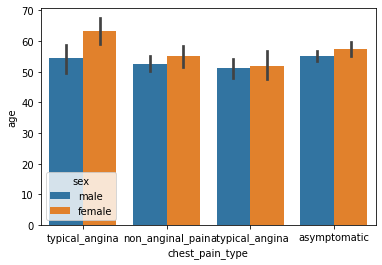

In [77]:
sns.barplot(x='chest_pain_type', 
            y='age', hue='sex', 
            data=heart_df);

The average and variance of people with typical angina is much higher in women than other types chest pain type. Women seem to be diagnose more with this condition.

Let compare the average cholesterol, maximum heart rate, and resting blood pressure on admission to the hospital. I will be visualizing this by grouping gender and visually representing the specific data by plotting the averages across cholesterol, maximum heart rate, blood pressure ( trtbps ).

In [78]:
#i will start by grouping the informations of the sexes in relations to cholesterol, maximum heart rate, blood pressure(trtbps)
genderGrouping = heart_df.groupby("sex")[["cholesterol", "max_heartrate", "trtbps"]].mean()
genderGrouping

,cholesterol,max_heartrate,trtbps
sex,,,
female,261.302083,151.125000,133.083333
male,239.289855,148.961353,130.946860


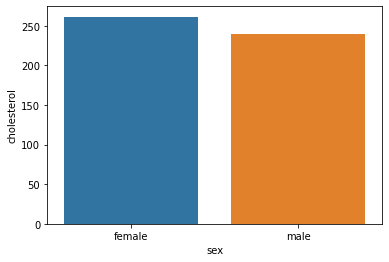

In [79]:
sns.barplot(x=genderGrouping.index,y=genderGrouping['cholesterol']);

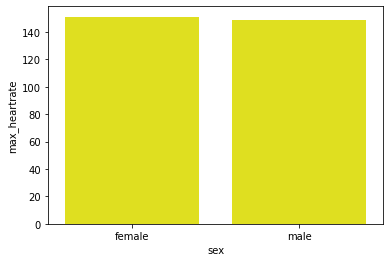

In [80]:
sns.barplot(x=genderGrouping.index,y=genderGrouping['max_heartrate'], color='yellow', );

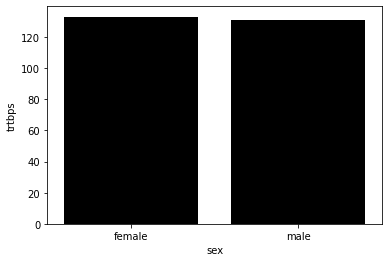

In [81]:
sns.barplot(x=genderGrouping.index,y=genderGrouping['trtbps'], color='black');

Comparing the average cholesterol, maximum heart rate, and blood pressure across both genders. It is noticed that the femaie population has an averagely higher cholesterol level and slightly high heartrate and blood pressure when compared to their male counter part.

Now! lets check the cholesterol and maximum heart rate across resting blood pressure.

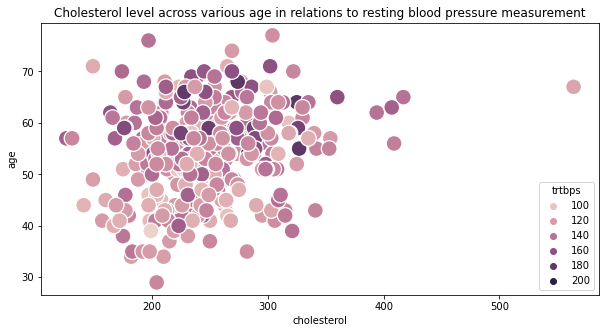

In [82]:
plt.figure(figsize=(10, 5))
plt.title('Cholesterol level across various age in relations to resting blood pressure measurement')
sns.scatterplot(x=heart_df['cholesterol'], y=heart_df['age'],  hue=heart_df['trtbps'], s=250);

From the chart you can notice that higher cholesterol levels were associated with peoples from ages 50 to 70 years and many lower cholesterol levels were associated with younger people. 

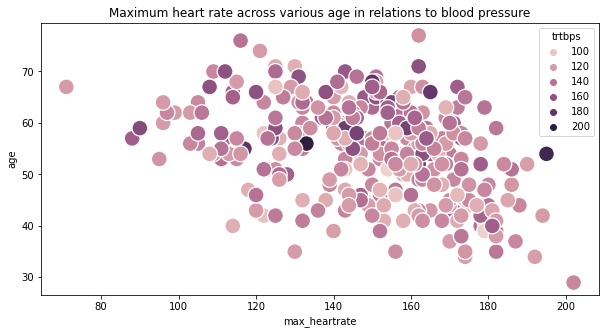

In [83]:
plt.figure(figsize=(10, 5))
plt.title('Maximum heart rate across various age in relations to blood pressure')
sns.scatterplot(x=heart_df['max_heartrate'], y=heart_df['age'],  hue=heart_df['trtbps'], s=250);

The distribution shows that the higher heart rate is associated with older age from 40 and above. Lets check the exercise induced angina for both genders to ascertain which gender is affected more.

In [84]:
#getting data for just sex and exercise induced angina
exerciseInducedAnginaBySex = heart_df.loc[ : , ['sex', 'exercise_induced_angina']].sort_values('sex').value_counts()

exerciseInducedAnginaBySex

sex     exercise_induced_angina
male    no                         130
        yes                         77
female  no                          74
        yes                         22
dtype: int64

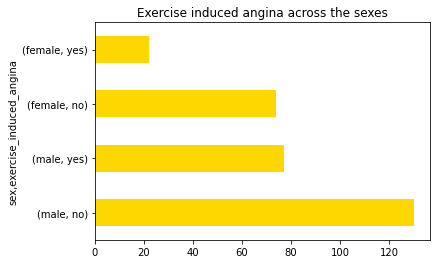

In [85]:
#plotting data for just sex and exercise induced angina
exerciseInducedAnginaBySex.plot(kind='barh', title='Exercise induced angina across the sexes', color='gold');

You can notice from the chart that men are affected more than women when it comes to exercise induced angina ( chest pain ) and this can be as a result of men been more often involved in physical activities than women. Now! lets analyze the heart attack across various sexes as well as ages in both sexes.

In [86]:
#getting data for just sex and heart_disease
sexHeartDisease = heart_df.loc[ : , ['sex', 'heart_attack']].value_counts()

sexHeartDisease

sex     heart_attack
male    yes             114
        no               93
female  no               72
        yes              24
dtype: int64

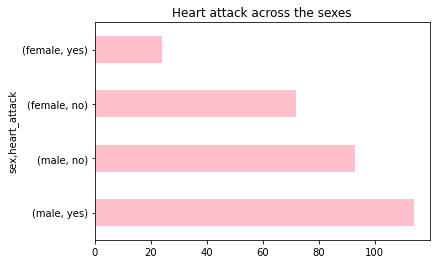

In [87]:
#plotting data for just sex and heart_disease
sexHeartDisease.plot(kind='barh', title='Heart attack across the sexes', color='pink');

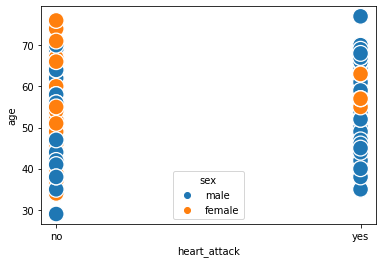

In [89]:
#checking to see the diffrent age prone to having a heart attack
sns.scatterplot(x=heart_df['heart_attack'], y=heart_df['age'],  hue=heart_df['sex'], s=250);

The plot interpretation of the data clearly expresses the fact that heart attack are more common amongst men than women. Also, the demographic that tends to be more prone to developing heart attacks are adults from like 35 years and above.

The fbs column represent data of people with fast blood sugar; another way of putting the condition called diabetes. It gives us reading of people with fasting sugar level above 120mg/dl and when you surpass that you are said to be diabetic.

In [90]:
#getting data for just sex and fast blood sugar level
diabetic = heart_df.loc[ : , ['sex', 'fbs']].value_counts( normalize='true')*100

diabetic

sex     fbs  
male    false    57.425743
female  false    27.722772
male    true     10.891089
female  true      3.960396
dtype: float64

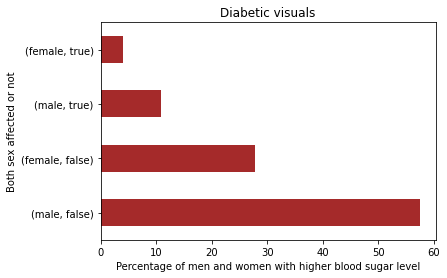

In [91]:
#plot data for just sex and fast blood sugar level
ax=diabetic.plot(kind='barh', title="Diabetic visuals", color='brown')
ax.set_xlabel('Percentage of men and women with higher blood sugar level')
ax.set_ylabel('Both sex affected or not');

The percentage of male population that are diabetic are higher than the female population that are diabetic. Same applies to those that are not affected by diabetes. 

Also! i will be analyzing data of different age affected by diabeties. As it is popular knowledge that diabetes can be associated with age as well.

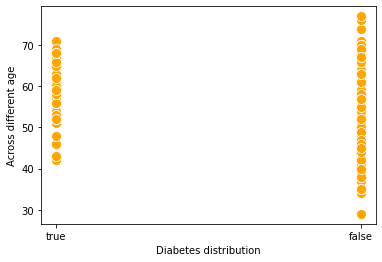

In [92]:
ab=sns.scatterplot(x=heart_df['fbs'], y=heart_df['age'], color='orange', s=100)
ab.set_xlabel('Diabetes distribution')
ab.set_ylabel('Across different age');

From the visuals is it is easy to point out that people from ages 40 and above have a higher tendency of been diagnoze with diabetes. One should be more cautious of his or her health as they get older.

I want to create insights on how the electro cardiographic results affects both gender by creating visuals just for sex and  the restecg column (electrocardiography)

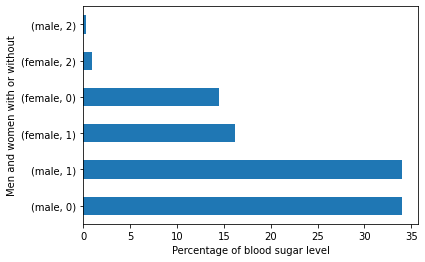

In [93]:
electrocardiograph = heart_df.loc[ : , ['sex', 'restecg']].value_counts(normalize='true')*100
ad=electrocardiograph.plot(kind='barh')
ad.set_xlabel('Percentage of blood sugar level')
ad.set_ylabel('Men and women with or without');

The restecg column simply stores data of the resting electrocardiographic results. Value 0 is showing probable or definite left ventricular hypertrophy. Value 1 is normal,and Value 2 is having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV). Overall, men outcome are better than the women outcome.

Now! let us check how the age affected
by the ST-T wave abnormality.

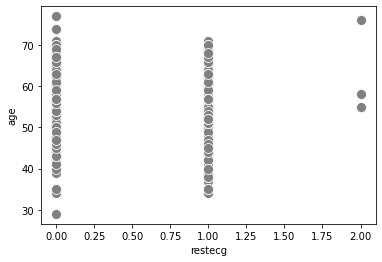

In [94]:
sns.scatterplot(x=heart_df['restecg'], y=heart_df['age'], color='grey', s=100);

People above 50 years of age tend to have the ECG value of 2. Which shows an ECG resuts reading associated with cardiovascular risk. Unlike value 0 that can be easily reversible with lowered and managed blood pressure, the value 2 when attained might pose a bigger problem.

The column thalassemia is used to represent data for a blood disorder called thalassemia with Value 0 is NULl and was dropped from the dataset previously. The Value 1 been a fixed defect (no blood flow in some part of the heart) and Value 2 as having a normal blood flow, Value 3 has a reversible defect (a blood flow is observed but it is not normal). I will be creating an insight into how this blood disaster affects both gender.

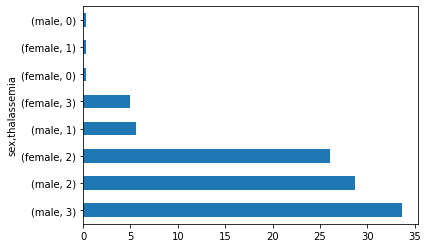

In [99]:
#getting data for just sex and thalassemia
thalassemiaBloodDisorder = heart_df.loc[ : , ['sex', 'thalassemia']].value_counts(normalize='true')*100
thalassemiaBloodDisorder.plot(kind='barh');

The male demographic are more affected forcefully by blood disorder than their female pairs. Now! lets see how it cut across diffrent age and sexes together.

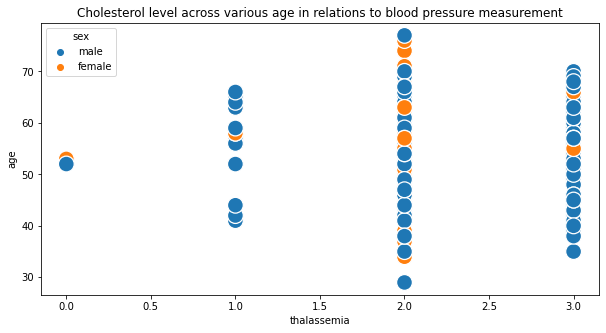

In [96]:
plt.figure(figsize=(10, 5))
plt.title('Cholesterol level across various age in relations to blood pressure measurement')
sns.scatterplot(x=heart_df['thalassemia'], y=heart_df['age'],  hue=heart_df['sex'], s=250);



Normal blood flow as indicated by value 2 cut across all age range, value 1 that indicates no blood flow in some part of the heart is observe in people from the age of 40 and above. value 3 that indicates a reversible defect is noticed among people from 33 years and above. This goes to show some sort of pattern with age been a strong factor of consideration.

This work was done to create a clearer picture on heart challenges and health overall, an indication and insight done to show patterns, situation, and hypothesis surrounding the situation. An overall representation of the entire data frame will be plotted below to give us some sort of feel into the entire project collectively. 

<Figure size 720x432 with 0 Axes>

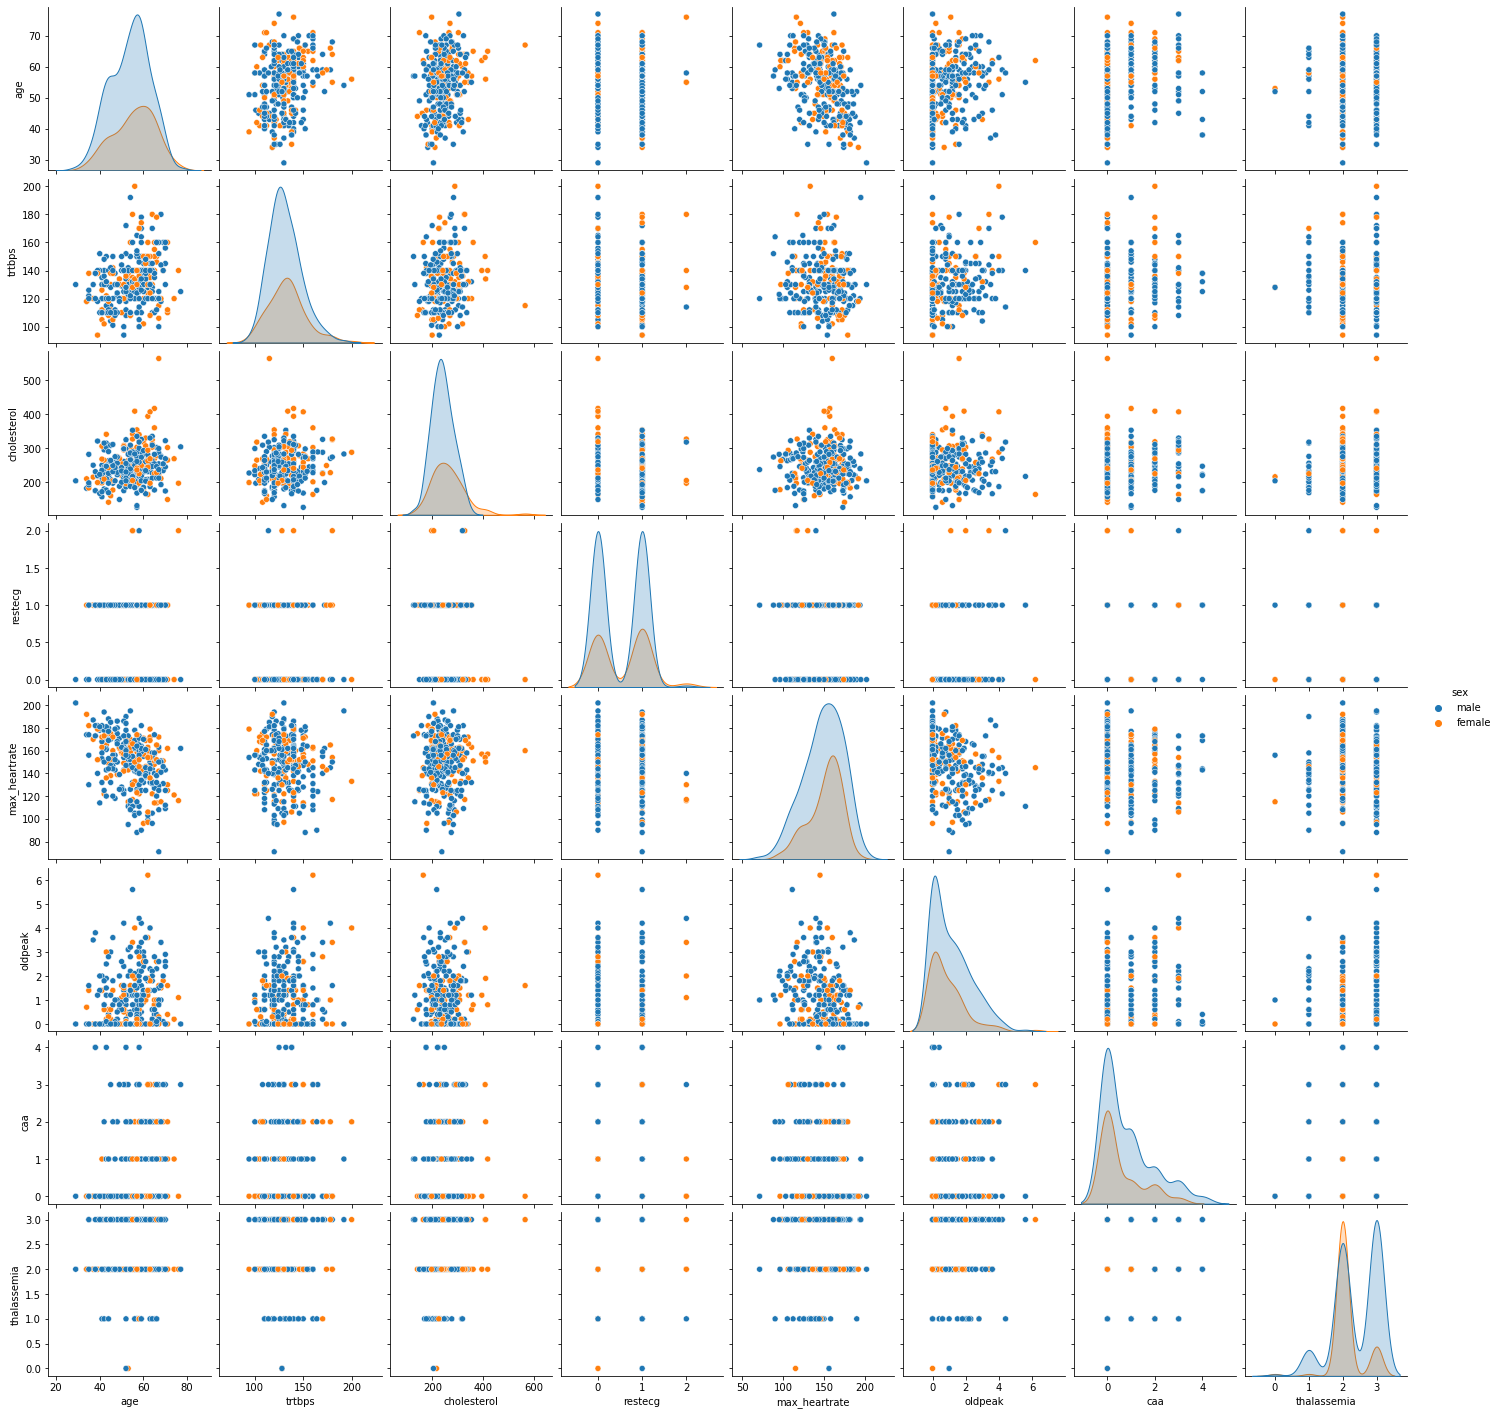

In [97]:
plt.figure(figsize=(10, 6))
sns.pairplot(heart_df, hue='sex');